# Agent-based modelling
## Schelling's model in Social Networks
### Authors: K. Zakharov, D. Sobolev

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
import numpy as np
import random
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

### Класс модели

In [15]:
np.random.seed(10)

def f(x):
    if x:
        friendly_p.disabled = False
        friendly_p.value = 0.75
    else:
        friendly_p.disabled = True
        friendly_p.value = 0

class Agent:

    def __init__(self, a_type, tolerance_p, friendly, friendly_p, assimilation_p):
        self.a_type = a_type
        self.change_location()
        self.wish = random.randint(0, 1)
        self.tol = round(uniform(0, 1), 2)
        self.fr = round(uniform(0, 1), 2)
        self.friendly = friendly
        #self.assimilation = random.randint(0, 100)
        #self.popular = random.randint(0, 50)
        #self.trust = random.choice([True, False])

    def change_location(self):
        self.location = round(uniform(0, 1),4), round(uniform(0, 1),4)

    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        distances = []
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        distances.sort(key=lambda x: x[0])
        neighbors = [agent for d, agent in distances[:local_neighbors.value]]

        num_same_type = sum(agent.a_type == 1 for agent in neighbors)
        return num_same_type >= require_same_type.value

    def update(self, agents):
        if self.friendly:
            if self.happy(agents) and self.a_type == 0:
                if self.fr < friendly_p.value and self.wish == 0 and self.tol < tolerance_p.value:
                    return
                elif self.fr < friendly_p.value and self.wish == 1 and self.tol < tolerance_p.value:
                    return
                elif self.fr < friendly_p.value and self.wish == 0 and self.tol > tolerance_p.value:
                    return
                elif self.fr < friendly_p.value and self.wish == 1 and self.tol > tolerance_p.value:
                    self.a_type = 1
                elif self.fr > friendly_p.value and self.wish == 0 and self.tol < tolerance_p.value:
                    return
                elif self.fr > friendly_p.value and self.wish == 1 and self.tol < tolerance_p.value:
                    self.a_type = 1
                elif self.fr > friendly_p.value and self.wish == 0 and self.tol > tolerance_p.value:
                    self.a_type = 1
                elif self.fr > friendly_p.value and self.wish == 1 and self.tol > tolerance_p.value:
                    self.a_type = 1
                else:
                    return    
            elif self.happy(agents) and self.a_type == 1:
                return
            
            elif not self.happy(agents) and self.a_type == 0:
                if self.fr < friendly_p.value and self.wish == 0 and self.tol < tolerance_p.value:
                    return
                elif self.fr < friendly_p.value and self.wish == 1 and self.tol < tolerance_p.value:
                    while not self.happy(agents):
                        self.change_location()
                elif self.fr < friendly_p.value and self.wish == 0 and self.tol > tolerance_p.value:
                    return
                elif self.fr < friendly_p.value and self.wish == 1 and self.tol > tolerance_p.value:
                    while not self.happy(agents):
                        self.change_location()
                elif self.fr > friendly_p.value and self.wish == 0 and self.tol < tolerance_p.value:
                    return
                elif self.fr > friendly_p.value and self.wish == 1 and self.tol < tolerance_p.value:
                    while not self.happy(agents):
                        self.change_location()
                elif self.fr > friendly_p.value and self.wish == 0 and self.tol > tolerance_p.value:
                    while not self.happy(agents):
                        self.change_location()
                elif self.fr > friendly_p.value and self.wish == 1 and self.tol > tolerance_p.value:
                    while not self.happy(agents):
                        self.change_location()
                else:
                    return
            else:
                return
        else:
            if self.happy(agents) and self.a_type == 0:
                if self.wish == 0 and self.tol < tolerance_p.value:
                    return
                elif self.wish == 1 and self.tol < tolerance_p.value:
                    return
                elif self.wish == 0 and self.tol > tolerance_p.value:
                    return
                elif self.wish == 1 and self.tol > tolerance_p.value:
                    self.a_type = 1
                else:
                    return
                
            elif self.happy(agents) and self.a_type == 1:
                return
            
            elif not self.happy(agents) and self.a_type == 0:
                if self.wish == 0 and self.tol < tolerence_p.value:
                    return
                elif self.wish == 1 and self.tol < tolerence_p.value:
                    while not self.happy(agents):
                        self.change_location()
                elif self.wish == 0 and self.tol > tolerence_p.value:
                    return
                elif self.wish == 1 and self.tol > tolerence_p.value:
                    while not self.happy(agents):
                        self.change_location()
                else:
                    return
            else:
                return
                    
def plot_distribution(agents, cycle_num):
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    for agent in agents:
        x, y = agent.location
        if agent.a_type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
            
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 1}
    ax.set_facecolor('white')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='black', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='yellow', **plot_args)
    ax.set_title(f'Iteration {cycle_num-1}')
    plt.show()

def function():
    agents = [Agent(0, tolerance_p.value, True, friendly_p.value, assimilation_p.value) for i in range(number_of_type0.value)]
    agents.extend(Agent(1, tolerance_p.value, False, friendly_p.value, assimilation_p.value) for i in range(number_of_type1.value))
    
        
    count = 1
    while True:
        plot_distribution(agents, count)
        count += 1
        no_one_moved = True
        for agent in agents:
            old_location = agent.location
            agent.update(agents)
            if agent.location != old_location:
                no_one_moved = False
        if no_one_moved:
            break
            
    ag1 = []
    ag2 = []
    for agent in agents:
        if agent.a_type == 0:
            ag1.append(agent.a_type)
        else:
            ag2.append(agent.a_type)
    labels = 'Informed', 'Uninformed'
    explodes = [0, 0.1]
    plt.pie([len(ag2),len(ag1)], labels=labels, shadow=True,explode=explodes,startangle = 90,autopct='%1.1f%%')

### Интерфейс  взаимодействия

IntText(value=300, description='Type Online')

IntText(value=200, description='Type Offline')

IntSlider(value=7, continuous_update=False, description='Neighbor', max=10)

IntSlider(value=5, continuous_update=False, description='Informed', max=10)

FloatSlider(value=0.7, continuous_update=False, description='Tolerance', max=1.0, step=0.01)

interactive(children=(Checkbox(value=False, description='Friendly'), Output()), _dom_classes=('widget-interact…

FloatSlider(value=0.0, continuous_update=False, description='Friendly', disabled=True, max=1.0, step=0.01)

IntSlider(value=30, continuous_update=False, description='Assimilation')

IntSlider(value=7, continuous_update=False, description='Popularity', max=300)

Button(button_style='info', description='Simulate', style=ButtonStyle())

Output()

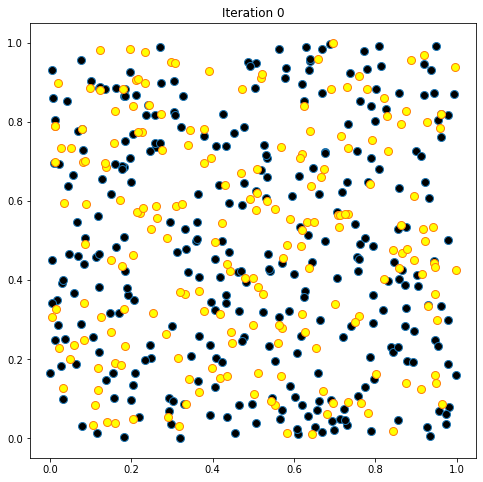

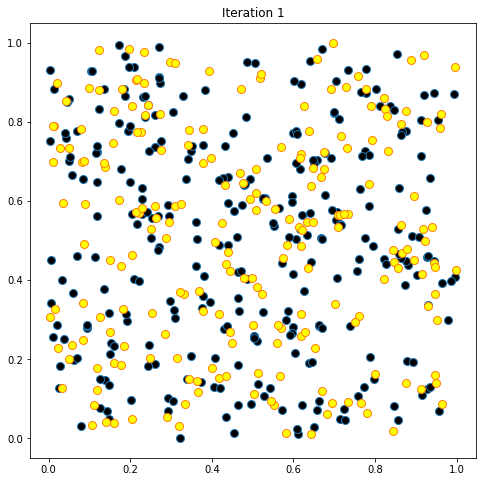

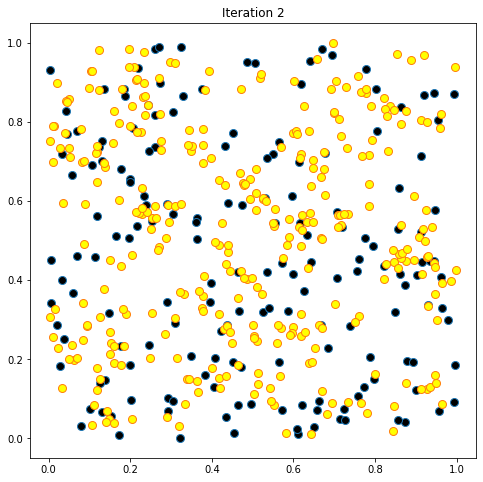

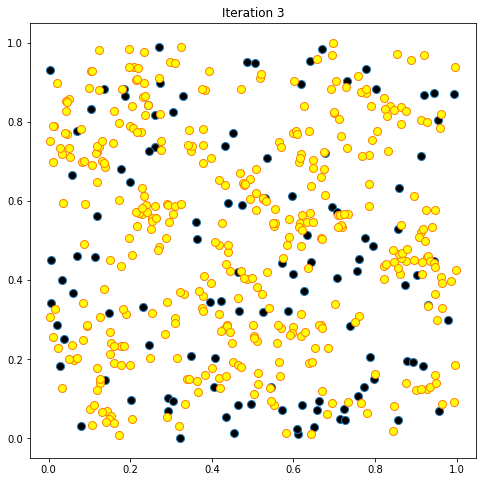

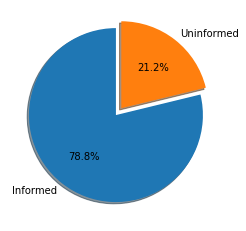

In [17]:
#количество агентов типа 0
number_of_type0 = widgets.IntText(
    value = 300,
    description="Type Online")
display(number_of_type0)

#количество агентов типа 1
number_of_type1 = widgets.IntText(
    value = 200,
    description="Type Offline")
display(number_of_type1)

#количество соседей
local_neighbors = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Neighbor',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(local_neighbors)

#reqires same time
require_same_type = widgets.IntSlider(
    value=5,
    min=0,
    max=10,
    step=1,
    description='Informed',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(require_same_type)

#процент толерантности
tolerance_p = widgets.FloatSlider(
    value=0.7,
    min=0,
    max=1.0,
    step=0.01,
    description='Tolerance',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
)
display(tolerance_p)

#use friendly

interact(f, x=widgets.Checkbox(description='Friendly',disabled=False))

#процент дружелюбности
friendly_p = widgets.FloatSlider(
    value=0,
    min=0,
    max=1.0,
    step=0.01,
    description='Friendly',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
)
display(friendly_p)

#процент ассимиляции
assimilation_p = widgets.IntSlider(
    value=30,
    min=0,
    max=100,
    step=1,
    description='Assimilation',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(assimilation_p)

#Популярность
popularity = widgets.IntSlider(
    value=7,
    min=0,
    max=number_of_type0.value,
    step=1,
    description='Popularity',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(popularity)

button = widgets.Button(description="Simulate", button_style='info')
output = widgets.Output()

display(button, output)

def on_button_clicked(a):
    function()

button.on_click(on_button_clicked)